### Author: Barnabas Makonda
+ Data Scource [Tanzania OpenData](http://opendata.go.tz/)
> This dataset contains ranking information of primary schools according to performance in primary school leaving certificate examinations.

In [28]:
#import important libraries am going to use
%matplotlib inline
from collections import defaultdict
import json
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

### Load Data

In [3]:
df = pd.read_csv('PrimarySchoolsPerfomanceAndLocation-2014.csv')
df.shape

(15866, 13)

In [4]:
df.columns

Index([u'CODE', u'NAME', u'REGION', u'DISTRICT', u'WARD', u'OWNERSHIP',
       u'LONGITUDE', u'LATITUDE', u'PASS_RATE', u'AVG_MARK',
       u'CHANGE_PREVIOUS_YEAR', u'RANK', u'YEAR_OF_RESULT'],
      dtype='object')

In [5]:
col =['NAME','REGION','DISTRICT','OWNERSHIP','PASS_RATE','AVG_MARK','CHANGE_PREVIOUS_YEAR','RANK']
for c in df.columns:
    if c not in col:
        df=df.drop(c,axis=1)

In [6]:
df.shape

(15866, 8)

In [7]:
df.OWNERSHIP.unique()

array(['GOVERNMENT', nan, 'NON GOVERNMENT'], dtype=object)

In [8]:
df.head(10)

,NAME,REGION,DISTRICT,OWNERSHIP,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR,RANK
0,BANGATA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,51.52,99.29,13.05,9426
1,BWAWANI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,26.83,85.78,8.42,13056
2,EKENYWA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,65.31,108.33,7.18,6842
3,EMAOI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100.00,135.09,25.83,2296
4,ENDONYOESOIYE PR. SCHOOL,ARUSHA,ARUSHA,NaN,43.84,96.10,11.51,10363
5,ENGALAONI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,88.10,120.17,30.46,4220
6,ENGORIKA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,42.86,100.10,5.98,9195
7,ENGUTUKOITI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,4.76,70.10,-25.99,15425
8,ENYUATA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,86.55,131.43,11.22,2666
9,GREEN ACRES PR. SCHOOL,ARUSHA,ARUSHA,NON GOVERNMENT,100.00,200.03,8.15,84


### We need to know number of primary school which did standard seven exam year 2014

In [9]:
df.shape[0]

15866

##### There about 15866 schools 

#### Ownership of the School 
can be seen below schools are grouped either Government or Non Government schools and there are about 2833 schools which have no type

In [10]:
print df.OWNERSHIP.unique()

['GOVERNMENT' nan 'NON GOVERNMENT']


how many do not have type or they are empty?

In [11]:
df[df.OWNERSHIP.isnull()].shape[0]

2833

Sample of school which ownership is empty

In [12]:
df[df.OWNERSHIP.isnull()].head(10)

,NAME,REGION,DISTRICT,OWNERSHIP,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR,RANK
4,ENDONYOESOIYE PR. SCHOOL,ARUSHA,ARUSHA,NaN,43.84,96.10,11.51,10363
18,KAMBI YA MAZIWA PR. SCHOOL,ARUSHA,ARUSHA,NaN,86.67,122.29,-0.13,3875
67,OLDONYOSAPUK PR. SCHOOL,ARUSHA,ARUSHA,NaN,98.73,160.06,66.59,744
86,THEMI YA SIMBA PR. SCHOOL,ARUSHA,ARUSHA,NaN,44.44,95.61,26.11,10496
94,SOTWA WILSON PR. SCHOOL,ARUSHA,ARUSHA,NaN,100.00,120.75,3.32,4118
98,ASSALAF ISLAMIC PR. SCHOOL,ARUSHA,ARUSHA,NaN,100.00,162.83,0.94,673
104,ARUSHA HILL SIDE,ARUSHA,ARUSHA,NaN,28.57,93.57,0.00,11085
105,EBENEZER,ARUSHA,ARUSHA,NaN,100.00,159.29,0.00,774
106,EUNOTO,ARUSHA,ARUSHA,NaN,72.41,118.93,0.00,4490
107,ILKONERE,ARUSHA,ARUSHA,NaN,68.75,107.90,0.00,6953


####  Those which ownership is not null, either Government or Non Government

In [13]:
df[df.OWNERSHIP.notnull()].head(10)

,NAME,REGION,DISTRICT,OWNERSHIP,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR,RANK
0,BANGATA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,51.52,99.29,13.05,9426
1,BWAWANI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,26.83,85.78,8.42,13056
2,EKENYWA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,65.31,108.33,7.18,6842
3,EMAOI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100.00,135.09,25.83,2296
5,ENGALAONI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,88.10,120.17,30.46,4220
6,ENGORIKA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,42.86,100.10,5.98,9195
7,ENGUTUKOITI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,4.76,70.10,-25.99,15425
8,ENYUATA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,86.55,131.43,11.22,2666
9,GREEN ACRES PR. SCHOOL,ARUSHA,ARUSHA,NON GOVERNMENT,100.00,200.03,8.15,84
10,ILBORU PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,93.94,131.69,6.17,2641


and they are 13033

In [14]:
df[df.OWNERSHIP.notnull()].shape[0]

13033

Lets plot a pie chat to visualize the data

In [15]:
government_schools =sum(df.OWNERSHIP=='GOVERNMENT') #Government schools
nongovernment_schools =sum(df.OWNERSHIP=='NON GOVERNMENT') #nongovernment schools
unknown = sum(df.OWNERSHIP.isnull()) #number of shools with unknown ownership
schl=df.shape[0] #number of schools


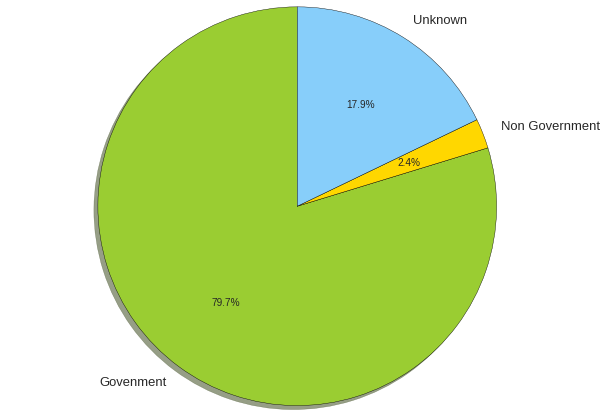

In [16]:
Labels =['Govenment', 'Non Government','Unknown']
fractions =[float(government_schools)/schl, float(nongovernment_schools)/schl, float(unknown)/schl] #percentage
colors = ['yellowgreen', 'gold', 'lightskyblue'] #colors for pie chart
explode = (0, 0, 0) #only explode the first slice

plt.pie(fractions, explode=explode, labels=Labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

### Lets play with the numbers now 

Lets look and see summary of the Pass Rate, Avarage Mark and  Change compared to previous year

In [17]:
df[['PASS_RATE','AVG_MARK','CHANGE_PREVIOUS_YEAR']].describe()

,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR
count,15866.000000,15866.000000,15866.000000
mean,55.935164,108.653736,4.821223
std,28.020727,26.142989,17.869999
min,0.000000,46.620000,-89.220000
25%,33.330000,90.440000,-3.960000
50%,55.320000,104.500000,0.470000
75%,80.000000,121.760000,12.385000
max,100.000000,234.700000,118.980000


The avarage Passing rate was 55.93% and Maximum passing rate was 100%(All students passed examination) while lowest was 0(Nobody passed)

Avarage mark was 108.7 maximum avarage mark per school was 234.7  and minimum was 46.62 

**NB:**These marks are for 5 subjects hence total of 250 marks

#### Lets play  a little more

+ How many schools  did have 100% pass rate?
+ Is there a government school which had 100% pass rate?
+ Which school did best of all schools?
+ Which did bad?

In [18]:
df[df.PASS_RATE == 100 ]

,NAME,REGION,DISTRICT,OWNERSHIP,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR,RANK
3,EMAOI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100,135.09,25.83,2296
9,GREEN ACRES PR. SCHOOL,ARUSHA,ARUSHA,NON GOVERNMENT,100,200.03,8.15,84
19,KIGONGONI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100,140.12,52.26,1824
20,KILIMANJARO PR. SCHOOL,ARUSHA,ARUSHA,NON GOVERNMENT,100,194.59,21.03,120
60,NURU PR. SCHOOL,ARUSHA,ARUSHA,NON GOVERNMENT,100,139.81,-11.19,1847
65,OLDENDERETI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100,140.04,3.99,1829
69,OLGILAI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100,151.46,45.51,1101
74,OLORIEN VALLEY PR. SCHOOL,ARUSHA,ARUSHA,NON GOVERNMENT,100,158.91,-15.03,788
83,SITI MWINYI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100,177.69,13.69,359
85,ST MAGRET PR. SCHOOL,ARUSHA,ARUSHA,NON GOVERNMENT,100,184.62,-41.24,235


In [19]:
print "There were %s schools which had 100 pass rate"%sum(df.PASS_RATE == 100 )

There were 1106 schools which had 100 pass rate


In [20]:
df[(df.PASS_RATE == 100) & (df.OWNERSHIP=="GOVERNMENT")].describe()

,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR,RANK
count,532,532.000000,532.00000,532.000000
mean,100,154.375583,27.88265,1306.710526
std,0,18.891587,25.02545,986.919266
min,100,114.670000,-37.93000,25.000000
25%,100,140.210000,10.17000,573.000000
50%,100,152.150000,26.03000,1065.000000
75%,100,167.410000,44.23500,1813.500000
max,100,215.110000,117.02000,5398.000000


In [21]:
print "Sample of Government school which have 100% passing rate"
df[(df.PASS_RATE == 100) & (df.OWNERSHIP=="GOVERNMENT")].head(10)

Sample of Government school which have 100% passing rate


,NAME,REGION,DISTRICT,OWNERSHIP,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR,RANK
3,EMAOI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100,135.09,25.83,2296
19,KIGONGONI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100,140.12,52.26,1824
65,OLDENDERETI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100,140.04,3.99,1829
69,OLGILAI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100,151.46,45.51,1101
83,SITI MWINYI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100,177.69,13.69,359
129,THEMI PR. SCHOOL,ARUSHA,ARUSHA(M),GOVERNMENT,100,148.05,6.66,1266
145,ENGIRA PR. SCHOOL,ARUSHA,ARUSHA(M),GOVERNMENT,100,132.71,11.76,2534
230,GONGALI PR. SCHOOL,ARUSHA,KARATU,GOVERNMENT,100,138.86,-13.37,1936
231,GYETIGHI PR. SCHOOL,ARUSHA,KARATU,GOVERNMENT,100,182.59,11.14,266
304,MARMO PR. SCHOOL,ARUSHA,KARATU,GOVERNMENT,100,159.19,-0.05,776


####  Lets group 100% pass rate by region

In [22]:
grouped = df[df.PASS_RATE == 100 ].groupby(df['REGION'])
passed_per_region = grouped.count()
passed_per_region.NAME

REGION
ARUSHA           109
DAR ES SALAAM    121
DODOMA            23
GEITA             36
IRINGA            41
KAGERA            96
KATAVI             7
KIGOMA             9
KILIMANJARO       92
LINDI             14
MANYARA           28
MARA              33
MBEYA             16
MOROGORO          50
MTWARA            40
MWANZA            87
NJOMBE            36
PWANI             42
RUKWA              8
RUVUMA            39
SHINYANGA         21
SIMIYU            14
SINGIDA           18
TABORA            21
TANGA            105
Name: NAME, dtype: int64

Dar es salaam leads with 121 schools and Katavi is the last with 7

In [23]:
df.groupby(df.REGION).count().NAME

REGION
ARUSHA            589
DAR ES SALAAM     506
DODOMA            727
GEITA             556
IRINGA            458
KAGERA            909
KATAVI            159
KIGOMA            627
KILIMANJARO       927
LINDI             462
MANYARA           542
MARA              722
MBEYA            1046
MOROGORO          844
MTWARA            609
MWANZA            891
NJOMBE            455
PWANI             520
RUKWA             348
RUVUMA            729
SHINYANGA         559
SIMIYU            508
SINGIDA           491
TABORA            723
TANGA             959
Name: NAME, dtype: int64

MBEYA is leading by having 1046

### We can visulize our data more by using seaborn

55.9351638724 55.32


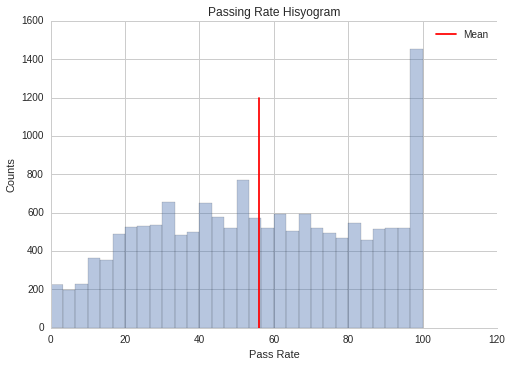

In [24]:
sns.set_context("notebook")
#lets get mean Pass Rate
mean_pass = df.PASS_RATE.mean()
print mean_pass, df.PASS_RATE.median()

with sns.axes_style("whitegrid"):
    df.PASS_RATE.hist(bins=30, alpha=0.4);
    plt.axvline(mean_pass, 0, 0.75, color='r', label='Mean')
    plt.xlabel("Pass Rate")
    plt.ylabel("Counts")
    plt.title("Passing Rate Hisyogram")
    plt.legend()
    sns.despine()

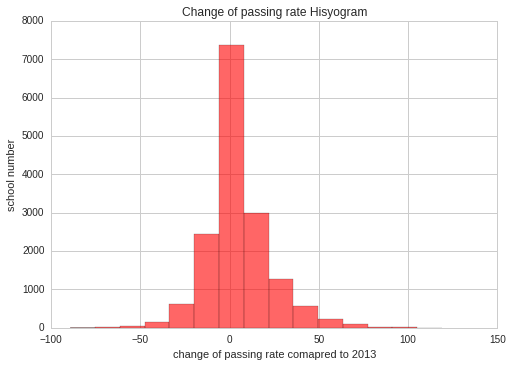

In [27]:
with sns.axes_style("whitegrid"):
    df.CHANGE_PREVIOUS_YEAR.hist(bins=15, alpha=0.6, color='r');
    plt.xlabel("change of passing rate comapred to 2013")
    plt.ylabel("school number")
    plt.title("Change of passing rate Hisyogram")

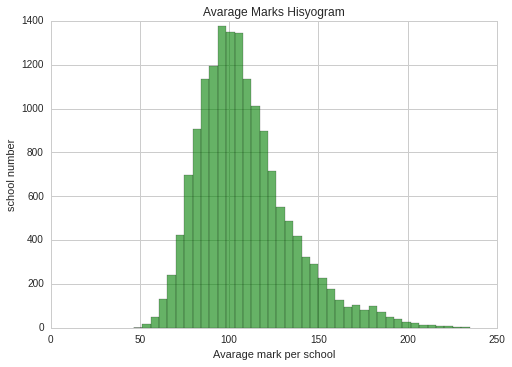

In [26]:

with sns.axes_style("whitegrid"):
    df.AVG_MARK.hist(bins=40,alpha=0.6, color='g')
    plt.xlabel("Avarage mark per school")
    plt.ylabel("school number")
    plt.title("Avarage Marks Hisyogram")
    plt.legend()

### Thank You